In [12]:
import sys
sys.path.append("../src") 
from dolfin import *
import meshio
import pyvista as pv
import numpy as np
from utils import *
from materials import *
import fea_static
import LB_static
import max_omega 
from matplotlib import pyplot as plt
%matplotlib notebook

In [13]:
mesh_file = "../mesh/disk.inp" # .inp or .xdmf
comp_list1 = np.linspace(1.,1.,101)
comp_list2 = np.linspace(1.,0.,22)[1:-1]
comp_list3 = np.linspace(0.,0.,15)
comp_list = np.concatenate((comp_list1,comp_list2,comp_list3))

mesh = read_mesh(mesh_file)
properties = get_properties(mesh,comp_list)
Displacement_BC = 'fix-free' # fix-free or free-free

<IPython.core.display.Javascript object>


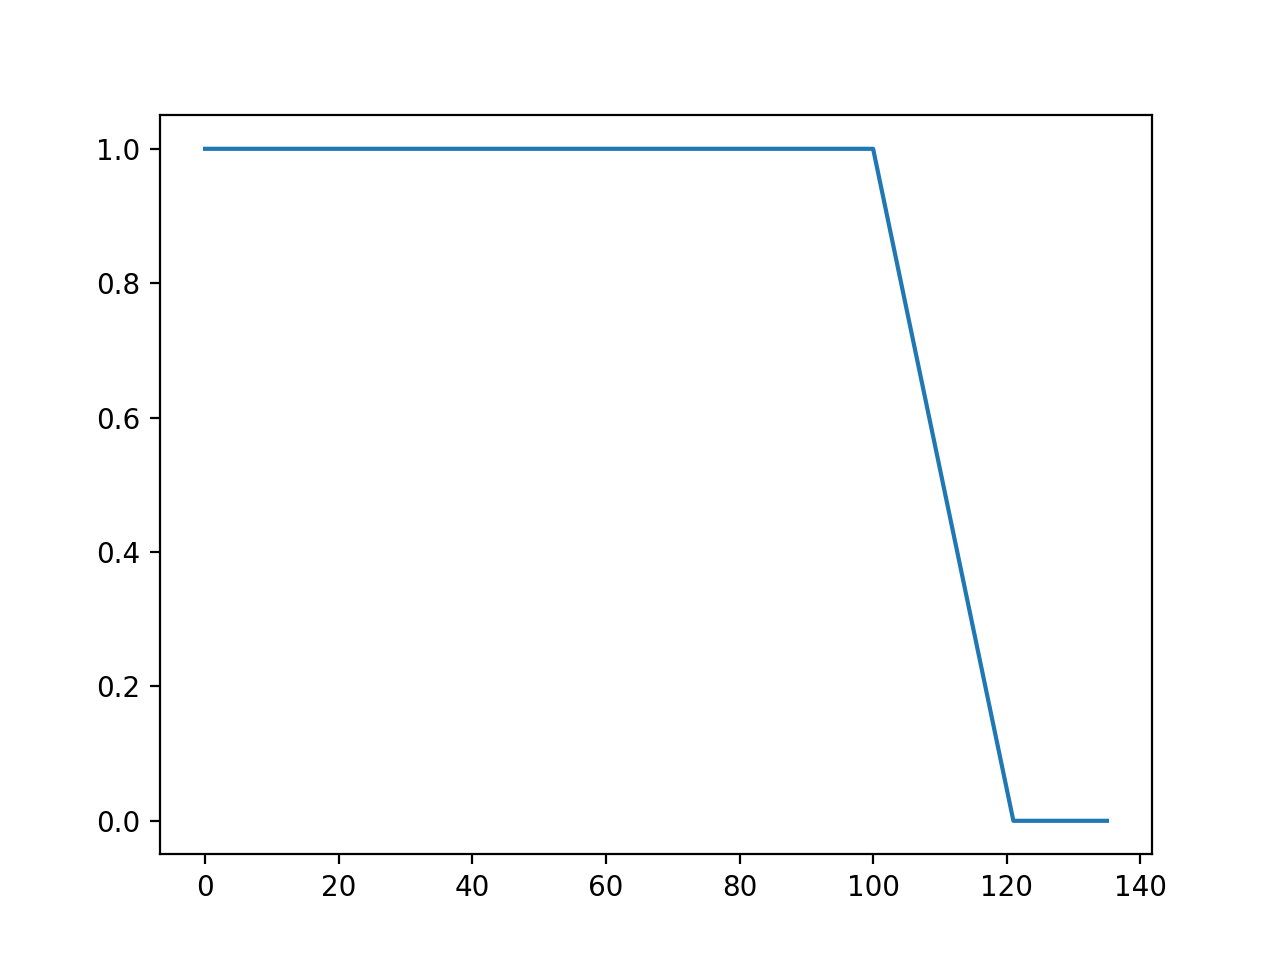

In [14]:
plt.figure()
plt.plot(comp_list)

In [15]:
def run_fea_wrap(omega,T_load):
    omega = omega+1e-5 ####
    n_cyc = 15
    time_step = 0.1 # time step size

    def load(t):
        t = t % 2
        return  T_load * np.interp(t,[0,1,2],[0.,1.,0.])

    t_list_cycle = np.linspace(0,1,int(1/time_step)+1)
    t_list = t_list_cycle
    for n in range(1,n_cyc*2):
        t_list = np.concatenate((t_list,t_list_cycle[1:]+n))

    results = fea_static.run_simulation(mesh,properties,load,omega,t_list,Displacement_BC,newton_step=0.9)
    
    PEEQ = results[:,1]
    period = (len(PEEQ)-1)/n_cyc
    assert period-int(period) == 0
    SD_flag = fea_static.check_PEEQ(PEEQ,int(period),tol=1e-8)
    
    return SD_flag

In [16]:
%%time
run_fea_wrap(1000,1000)

Solving linear variational problem.
Residual0: 650948.4387329816
Residual: 65094.8438732977
Residual: 6509.484387329798
Residual: 650.9484387329514
Residual: 65.09484387333954
Residual: 6.509484387352305
Residual: 0.6509484387289106
Solving linear variational problem.
Residual0: 650945.0626379095
Residual: 65094.50626379031
Residual: 6509.4506263788835
Residual: 650.9450626379105
Residual: 65.09450626381769
Residual: 6.509450626378794
Residual0: 650950.9211404921
Solving linear variational problem.
Residual: 65095.09211404843
Residual: 6509.509211404897
Residual: 650.9509211405718
Residual: 65.09509211407004
Residual: 6.509509211412772
Residual: 0.6509509210754482
Residual0: 650945.0626407821
Solving linear variational problem.
Residual: 65094.50626407731
Residual: 6509.450626407607
Residual: 650.9450626407473
Residual: 65.09450626407825
Residual: 6.509450626470863
Residual: 0.6509450626214066
Residual0: 650945.0626349316
Solving linear variational problem.
Residual: 65094.5062634924
R

Residual: 0.6509509212536884
Solving linear variational problem.
Residual0: 650945.0626407858
Residual: 65094.50626407806
Residual: 6509.450626407746
Residual: 650.9450626407864
Residual: 65.09450626408622
Residual: 6.5094506263781655
Solving linear variational problem.
Residual0: 650937.9022392354
Residual: 65093.790223922784
Residual: 6509.3790223922515
Residual: 650.9379022392046
Residual: 65.0937902238518
Residual: 6.509379022386168
Solving linear variational problem.
Residual0: 650950.9210688898
Residual: 65095.09210688826
Residual: 6509.509210688767
Residual: 650.9509210690243
Residual: 65.09509210685783
Residual: 6.509509210706229
Residual: 0.6509509210619105
Solving linear variational problem.
Residual0: 650945.0626407827
Residual: 65094.50626407778
Residual: 6509.450626407764
Residual: 650.9450626407302
Residual: 65.09450626400675
Residual: 6.509450626444598
Residual: 0.6509450626734082
Solving linear variational problem.
Residual0: 650945.0626349301
Residual: 65094.5062634925

Residual: 6.509509211438784
Residual: 0.6509509210906185
Solving linear variational problem.
Residual0: 650945.0626407885
Residual: 65094.50626407853
Residual: 6509.450626407775
Residual: 650.9450626408211
Residual: 65.09450626411086
Residual: 6.509450626424089
Residual: 0.6509450625387719
Solving linear variational problem.
Residual0: 650945.0626349242
Residual: 65094.50626349192
Residual: 6509.45062634914
Residual: 650.9450626349059
Residual: 65.09450626343435
Residual: 6.509450626367001
Residual: 0.6509450626029532
Solving linear variational problem.
Residual0: 650943.7607447992
Residual: 65094.37607447931
Residual: 6509.437607447883
Residual: 650.9437607448173
Residual: 65.09437607456567
Residual: 6.509437607481693
Residual: 0.6509437608048821
Solving linear variational problem.
Residual0: 650945.0626336226
Residual: 65094.50626336153
Residual: 6509.450626336081
Residual: 650.9450626336392
Residual: 65.09450626346641
Residual: 6.509450626374413
Residual: 0.6509450627020924
Solving 

Residual: 650.9450626349587
Residual: 65.09450626354888
Residual: 6.5094506263212
Solving linear variational problem.
Residual0: 650950.921140488
Residual: 65095.092114048246
Residual: 6509.509211404718
Residual: 650.9509211405536
Residual: 65.095092114081
Residual: 6.509509211411768
Residual: 0.6509509212144656
Solving linear variational problem.
Residual0: 650945.0626407829
Residual: 65094.506264077354
Residual: 6509.45062640774
Residual: 650.9450626408287
Residual: 65.09450626408075
Residual: 6.509450626486776
Residual: 0.6509450627061227
Solving linear variational problem.
Residual0: 650943.760744799
Residual: 65094.37607447945
Residual: 6509.437607447827
Residual: 650.9437607448308
Residual: 65.09437607441275
Residual: 6.509437607399425
Solving linear variational problem.
Residual0: 650950.921127469
Residual: 65095.092112746504
Residual: 6509.5092112745715
Residual: 650.9509211274716
Residual: 65.09509211278134
Residual: 6.5095092112301804
Solving linear variational problem.
Resid

Residual: 650.9509211990425
Residual: 65.0950921199027
Residual: 6.509509211946474
Solving linear variational problem.
Residual0: 650950.9211990846
Residual: 65095.0921199081
Residual: 6509.509211990703
Residual: 650.9509211991133
Residual: 65.09509211984025
Residual: 6.509509212012391
Residual: 0.6509509211672693
Solving linear variational problem.
Residual0: 650945.0626407829
Residual: 65094.50626407748
Residual: 6509.450626407647
Residual: 650.9450626407634
Residual: 65.09450626410167
Residual: 6.509450626398607
Solving linear variational problem.
Residual0: 650950.9211404881
Residual: 65095.09211404813
Residual: 6509.5092114046965
Residual: 650.9509211405646
Residual: 65.09509211408793
Residual: 6.509509211415477
Residual: 0.6509509211390625
Solving linear variational problem.
Residual0: 650943.7607389519
Residual: 65094.376073894346
Residual: 6509.437607389307
Residual: 650.9437607388725
Residual: 65.09437607380261
Residual: 6.509437607456275
Residual: 0.6509437607297585
Solving l

Residual: 6509.509211404692
Residual: 650.9509211404416
Residual: 65.09509211406832
Residual: 6.509509211385594
Solving linear variational problem.
Residual0: 650950.921199084
Residual: 65095.092119907575
Residual: 6509.509211990765
Residual: 650.9509211990054
Residual: 65.09509211987867
Residual: 6.509509212016457
Residual: 0.6509509212851171
Solving linear variational problem.
Residual0: 650945.0626407716
Residual: 65094.506264076466
Residual: 6509.450626407529
Residual: 650.9450626407919
Residual: 65.09450626409114
Residual: 6.5094506263749645
Solving linear variational problem.
Residual0: 650950.9211404995
Residual: 65095.09211404907
Residual: 6509.509211404909
Residual: 650.9509211405381
Residual: 65.0950921141068
Residual: 6.509509211379518
Solving linear variational problem.
Residual0: 650937.9021806617
Residual: 65093.79021806542
Residual: 6509.379021806433
Residual: 650.9379021805223
Residual: 65.093790218118
Residual: 6.509379021832932
Residual: 0.6509379022303523
Solving lin

Residual: 6.509450626346205
Solving linear variational problem.
Residual0: 650950.9211404772
Residual: 65095.09211404702
Residual: 6509.509211404688
Residual: 650.9509211404377
Residual: 65.09509211408862
Residual: 6.509509211455915
Residual: 0.6509509211342526
Solving linear variational problem.
Residual0: 650945.0626407937
Residual: 65094.50626407884
Residual: 6509.450626407825
Residual: 650.9450626407495
Residual: 65.09450626403259
Residual: 6.509450626416742
Residual: 0.6509450626507026
Solving linear variational problem.
Residual0: 650945.062634913
Residual: 65094.50626349083
Residual: 6509.45062634899
Residual: 650.9450626349083
Residual: 65.09450626344606
Residual: 6.509450626415824
Residual: 0.6509450626251462
Solving linear variational problem.
Residual0: 650945.0626349357
Residual: 65094.50626349302
Residual: 6509.45062634924
Residual: 650.9450626348774
Residual: 65.09450626350215
Residual: 6.50945062630927
Solving linear variational problem.
Residual0: 650937.9022392468
Resi

Solving linear variational problem.
Residual0: 650945.062640791
Residual: 65094.50626407798
Residual: 6509.450626407744
Residual: 650.9450626407997
Residual: 65.0945062640961
Residual: 6.509450626358642
Solving linear variational problem.
Residual0: 650950.9211405019
Residual: 65095.092114049345
Residual: 6509.509211404823
Residual: 650.9509211404508
Residual: 65.09509211406504
Residual: 6.509509211411657
Residual: 0.6509509210626437
Solving linear variational problem.
Residual0: 650945.0626407719
Residual: 65094.50626407685
Residual: 6509.4506264076535
Residual: 650.9450626407596
Residual: 65.09450626406925
Residual: 6.509450626420302
Residual: 0.6509450626796196
Solving linear variational problem.
Residual0: 650945.0626349354
Residual: 65094.506263493
Residual: 6509.4506263492585
Residual: 650.945062634869
Residual: 65.09450626353949
Residual: 6.509450626337584
Solving linear variational problem.
Residual0: 650950.9211404767
Residual: 65095.09211404713
Residual: 6509.50921140454
Resi

1

In [6]:
%%time
omega_max = max_omega.run(mesh,properties,Displacement_BC)

Trying Omega =  1000
Residual =  714.9072173832941
Residual =  3.848212357446955e-09
Trying Omega =  2000
Residual =  2144.7216521497107
Residual =  1.1391760044184608e-08
Trying Omega =  3000
Residual =  3574.536086916992
Residual =  67.65578744955592
Residual =  6.0379490166080645
Residual =  0.006236093680099123
Residual =  2.2409024862817036e-08
Trying Omega =  4000
Residual =  5004.350521683075
Residual =  66504.97193093292
Residual =  77304.02548210656
Residual =  85924.20348685692
Residual =  384063.7100309081
Residual =  16975.23668560753
Residual =  2960.79685284771
Residual =  80.13096004083569
Residual =  0.057937105739311406
Residual =  3.082210133967915e-06
Trying Omega =  3500.0
Residual =  2323.448456495723
Residual =  3757.1524943728946
Residual =  369.4374070517939
Residual =  58.67958717054048
Residual =  1.6138194903872867
Residual =  0.000123129548733437
Trying Omega =  4000.0
Residual =  2680.902065308624
Residual =  80663.00764915411
Residual =  79092.74358959505


In [17]:
num_om = 5
omega_list = (np.arange(1,num_om)/num_om*omega_max**2)**0.5 + 1e-5
omega_list

array([1749.54850958, 2474.23522614, 3030.30690158, 3499.09700917])

In [9]:
T_SD_list_fea

[]

In [18]:
T_max = 2000.
T_SD_list_LB = []
for omega in omega_list:
    T_sd = LB_static.run(mesh,properties,T_max,omega,Displacement_BC)
    T_SD_list_LB.append(T_sd)

Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
    Residual0: 2188.3260879938357
    Residual: 1.105854714200253e-08
Solving linear variational problem.
    Residual0: 32547.393960091846
    Residual: 1.0935911514478563e-09
Solving linear variational problem.
    Residual0: 32547.393960091842
    Residual: 1.1894226333320654e-09
Solving linear variational problem.
    Residual0: 32547.3939600918
    Residual: 1.2577931677623105e-09
Solving linear variational problem.
    Residual0: 32547.39396009185
    Residual: 1.2022276666461586e-09
Solving linear variational problem.
    Residual0: 32547.393960091624
    Residual: 1.3900327044973781e-09
Solving linear variational problem.
    Residual0: 32547.393960091897
    Residual: 1.1687660324025304e-09
Solving linear variational problem.
    Residual0: 32547.393960091817
    Residual: 1.2734438496038308e-09
Solving linear variational problem.
    Residual0: 32547.393960091948
    Re

    Residual: 5.25193615338685
    Residual: 0.001252811367413827
Solving linear variational problem.
    Residual0: 32547.39396010141
    Residual: 1.1050653118545397
    Residual: 8.304885934089591e-05
Solving linear variational problem.
    Residual0: 32547.393960089088
    Residual: 7.027516921886622
    Residual: 0.004769944158709229
Solving linear variational problem.
    Residual0: 32547.3939601016
    Residual: 15.056359125778803
    Residual: 0.0403026978955001
Solving linear variational problem.
    Residual0: 32547.393959904995
    Residual: 12.42988004206145
    Residual: 0.02940914773340869
Solving linear variational problem.
    Residual0: 32547.393959781264
    Residual: 3.0595732266795723
    Residual: 0.00042552667153419356
Solving linear variational problem.
    Residual0: 32547.393960083587
    Residual: 14.597831750694851
    Residual: 0.04140705148290909
Solving linear variational problem.
    Residual0: 32547.39395922783
    Residual: 0.13163526675999282
Solving l

    Residual: 0.08237143192500701
Solving linear variational problem.
    Residual0: 32547.393716047078
    Residual: 0.07835276024420827
Solving linear variational problem.
    Residual0: 32547.39373411056
    Residual: 0.07658375768766862
Solving linear variational problem.
    Residual0: 32547.3937395677
    Residual: 0.07493483421349693
Solving linear variational problem.
    Residual0: 32547.393744524485
    Residual: 0.073316267575795
Solving linear variational problem.
    Residual0: 32547.39374938189
    Residual: 0.07172351531708086
Solving linear variational problem.
    Residual0: 32547.39375414748
    Residual: 0.07015685254477703
Solving linear variational problem.
    Residual0: 32547.393758830196
    Residual: 1.676896696463033
    Residual: 2.8719467859995584e-06
Solving linear variational problem.
    Residual0: 32547.393960089128
    Residual: 5.406632505914536
    Residual: 0.00014802341284716656
Solving linear variational problem.
    Residual0: 32547.39396004488
  

    Residual0: 32547.393960086778
    Residual: 14.282789446936928
    Residual: 0.000679589705575632
Solving linear variational problem.
    Residual0: 32547.393959261964
    Residual: 2.378091982667614
    Residual: 1.6192020194471627e-05
Solving linear variational problem.
    Residual0: 32547.393960046233
    Residual: 18.05776406616879
    Residual: 0.00430466039440792
Solving linear variational problem.
    Residual0: 32547.39395536902
    Residual: 0.08713123310718505
Solving linear variational problem.
    Residual0: 32547.392726201484
    Residual: 20.70863355631982
    Residual: 0.008536888046886392
Solving linear variational problem.
    Residual0: 32547.393939669222
    Residual: 19.653947294144903
    Residual: 0.014777942136770738
Solving linear variational problem.
    Residual0: 32547.39393516985
    Residual: 0.08397383487630747
Solving linear variational problem.
    Residual0: 32547.39317740994
    Residual: 0.06443300485269748
Solving linear variational problem.
   

    Residual: 0.0007568519639614696
Solving linear variational problem.
    Residual0: 32547.393958211815
    Residual: 0.13084114124247498
Solving linear variational problem.
    Residual0: 32547.39154238305
    Residual: 24.372699545247748
    Residual: 0.005580150286904145
Solving linear variational problem.
    Residual0: 32547.39394850082
    Residual: 0.0783673372829977
Solving linear variational problem.
    Residual0: 32547.39198922104
    Residual: 0.07682120893066706
Solving linear variational problem.
    Residual0: 32547.39201282152
    Residual: 0.0761302844839539
Solving linear variational problem.
    Residual0: 32547.39203166394
    Residual: 61.73674202233134
    Residual: 0.05183762914074592
Solving linear variational problem.
    Residual0: 32547.393713703546
    Residual: 55.2392176477468
    Residual: 0.0794994916736332
Solving linear variational problem.
    Residual0: 32547.39369022503
    Residual: 0.05407559107072163
Solving linear variational problem.
    Resi

Solving linear variational problem.
    Residual0: 32547.391662776878
    Residual: 0.0646116698420543
Solving linear variational problem.
    Residual0: 32547.39168096031
    Residual: 1.6201199120005088
    Residual: 1.1348296407054153e-05
Solving linear variational problem.
    Residual0: 32547.39396000427
    Residual: 51.782455154540635
    Residual: 0.02937280938044272
Solving linear variational problem.
    Residual0: 32547.39375714364
    Residual: 51.56249449709266
    Residual: 0.05565908819806509
Solving linear variational problem.
    Residual0: 32547.393684348113
    Residual: 0.04513978202209215
Solving linear variational problem.
    Residual0: 32547.392731814827
    Residual: 0.04392934109340003
Solving linear variational problem.
    Residual0: 32547.39275605704
    Residual: 0.04347374291605126
Solving linear variational problem.
    Residual0: 32547.3927687705
    Residual: 0.04302914306887404
Solving linear variational problem.
    Residual0: 32547.39278113089
    R

    Residual: 0.01035856841422949
Solving linear variational problem.
    Residual0: 32547.393959679936
    Residual: 0.15271584983519654
Solving linear variational problem.
    Residual0: 32547.39394601516
    Residual: 0.09869422513321355
Solving linear variational problem.
    Residual0: 32547.393947752644
    Residual: 4.113616171721506
    Residual: 0.008241525743932186
Solving linear variational problem.
    Residual0: 32547.393959817076
    Residual: 0.3015493479465252
Solving linear variational problem.
    Residual0: 32547.393913862077
    Residual: 15.255761717863308
    Residual: 0.008332888978623451
Solving linear variational problem.
    Residual0: 32547.393960341382
    Residual: 0.0849021922674789
Solving linear variational problem.
    Residual0: 32547.393938992107
    Residual: 0.08271167020022008
Solving linear variational problem.
    Residual0: 32547.39393821384
    Residual: 4.449180958251336
    Residual: 0.0016605798279310526
Solving linear variational problem.
 

    Residual: 0.06957467562827128
Solving linear variational problem.
    Residual0: 32547.393552987516
    Residual: 0.057983255745700346
Solving linear variational problem.
    Residual0: 32547.39357893979
    Residual: 0.05685309688058111
Solving linear variational problem.
    Residual0: 32547.3935866693
    Residual: 0.05578166886335403
Solving linear variational problem.
    Residual0: 32547.393593932713
    Residual: 1.3313672198452755
    Residual: 1.4054853130575471e-06
Solving linear variational problem.
    Residual0: 32547.393960090183
    Residual: 18.15951422133504
    Residual: 0.0013385186784061697
Solving linear variational problem.
    Residual0: 32547.393958844415
    Residual: 20.80972022621822
    Residual: 0.006833908464998235
    Residual0: 32547.39395494606
Solving linear variational problem.
    Residual: 41.08247143448964
    Residual: 1.722854026124954
    Residual: 8.064772365710127e-05
Solving linear variational problem.
    Residual0: 32547.393959988498
  

Solving linear variational problem.
    Residual0: 32547.393159444826
    Residual: 23.529922656354795
    Residual: 0.0013750697796834036
Solving linear variational problem.
    Residual0: 32547.39395598514
    Residual: 12.23920775964975
    Residual: 0.0013923537192445097
Solving linear variational problem.
    Residual0: 32547.393957227807
    Residual: 0.0871540085430256
Solving linear variational problem.
    Residual0: 32547.3921604185
    Residual: 10.913008933342383
    Residual: 0.0015664681935869589
Solving linear variational problem.
    Residual0: 32547.39395247168
    Residual: 33.81477341432481
    Residual: 0.028372137348271716
Solving linear variational problem.
    Residual0: 32547.393861103134
    Residual: 0.05528751288505577
Solving linear variational problem.
    Residual0: 32547.393042599033
    Residual: 0.045714020103451734
Solving linear variational problem.
    Residual0: 32547.393069645736
    Residual: 0.045126650488115504
Solving linear variational problem

    Residual: 0.0339470225293187
Solving linear variational problem.
    Residual0: 32547.392978746753
    Residual: 0.03361829195216495
Solving linear variational problem.
    Residual0: 32547.392988122778
    Residual: 0.03329283431656392
Solving linear variational problem.
    Residual0: 32547.392997396764
    Residual: 0.03297062273186583
Solving linear variational problem.
    Residual0: 32547.393006568298
    Residual: 2.9203474828846843
    Residual: 8.108646070931384e-06
Solving linear variational problem.
    Residual0: 32547.393960058995
    Residual: 17.39407953413026
    Residual: 0.0005490093890962658
Solving linear variational problem.
    Residual0: 32547.39395714653
    Residual: 15.310347482153041
    Residual: 0.0015799705052567336
Solving linear variational problem.
    Residual0: 32547.393954518502
    Residual: 0.06166165783785031
Solving linear variational problem.
    Residual0: 32547.391803960792
    Residual: 0.05328634411236206
Solving linear variational probl

    Residual: 0.0018721372223874648
Solving linear variational problem.
    Residual0: 32547.39395144316
    Residual: 0.0453515389372058
Solving linear variational problem.
    Residual0: 32547.391837851585
    Residual: 0.041495348369896816
Solving linear variational problem.
    Residual0: 32547.39184992884
    Residual: 0.04125795159272731
Solving linear variational problem.
    Residual0: 32547.391862547163
    Residual: 12.439280339796635
    Residual: 0.0012341193128844667
Solving linear variational problem.
    Residual0: 32547.393946059365
    Residual: 9.344103283301498
    Residual: 0.0013080190035480927
Solving linear variational problem.
    Residual0: 32547.393949721187
    Residual: 0.039282337460856534
Solving linear variational problem.
    Residual0: 32547.39294917416
    Residual: 0.02552739743080525
Solving linear variational problem.
    Residual0: 32547.392964146282
    Residual: 0.025321239682402276
Solving linear variational problem.
    Residual0: 32547.3929721

    Residual: 0.14457782807522138
Solving linear variational problem.
    Residual0: 32547.393902609292
    Residual: 5.0655424384267524
    Residual: 0.00022538231318600433
Solving linear variational problem.
    Residual0: 32547.393960111724
    Residual: 6.86815796524883
    Residual: 0.0007448851575358488
Solving linear variational problem.
    Residual0: 32547.39396021827
    Residual: 0.07788436035131
Solving linear variational problem.
    Residual0: 32547.39389102853
    Residual: 1.732885758272151
    Residual: 0.0001716020737729729
Solving linear variational problem.
    Residual0: 32547.39396006491
    Residual: 13.541199548322197
    Residual: 0.07944268097940958
Solving linear variational problem.
    Residual0: 32547.393954468633
    Residual: 0.06860829471626981
Solving linear variational problem.
    Residual0: 32547.39388256421
    Residual: 0.8551887785358907
    Residual: 4.356399945065519e-05
Solving linear variational problem.
    Residual0: 32547.393960088943
    

    Residual: 19.719938637297048
    Residual: 0.0035135338100117834
Solving linear variational problem.
    Residual0: 32547.393952891955
    Residual: 47.954032115514735
    Residual: 0.05976688057171548
Solving linear variational problem.
    Residual0: 32547.39344530862
    Residual: 0.04811694056652749
Solving linear variational problem.
    Residual0: 32547.393197659647
    Residual: 0.039004861040836475
Solving linear variational problem.
    Residual0: 32547.393207880297
    Residual: 0.038495750654186534
Solving linear variational problem.
    Residual0: 32547.393217318022
    Residual: 9.845040770709643
    Residual: 0.00023177948773233026
Solving linear variational problem.
    Residual0: 32547.393959181827
    Residual: 23.835710786664734
    Residual: 0.0048187901316182336
Solving linear variational problem.
    Residual0: 32547.393949067773
    Residual: 52.01811699861279
    Residual: 0.06727267808179743
Solving linear variational problem.
    Residual0: 32547.3933119019

    Residual: 0.0010652326600307865
Solving linear variational problem.
    Residual0: 32547.39395537457
    Residual: 44.86684897975538
    Residual: 0.021891455885670433
Solving linear variational problem.
    Residual0: 32547.393614360168
    Residual: 0.03585873513806613
Solving linear variational problem.
    Residual0: 32547.393179398736
    Residual: 0.022408192028951956
Solving linear variational problem.
    Residual0: 32547.393145382048
    Residual: 0.022213627062433693
Solving linear variational problem.
    Residual0: 32547.3931521985
    Residual: 0.022042124984271744
Solving linear variational problem.
    Residual0: 32547.393158258754
    Residual: 0.021869843391774595
Solving linear variational problem.
    Residual0: 32547.393164287754
    Residual: 0.021699010156979188
Solving linear variational problem.
    Residual0: 32547.393170265375
    Residual: 0.021529600208856838
Solving linear variational problem.
    Residual0: 32547.393176196398
    Residual: 0.0213616024

Solving linear variational problem.
    Residual0: 32547.393305523736
    Residual: 0.013940221666332887
Solving linear variational problem.
    Residual0: 32547.393309255003
    Residual: 0.013857141084587497
Solving linear variational problem.
    Residual0: 32547.393312977885
    Residual: 0.013774595577227013
Solving linear variational problem.
    Residual0: 32547.393316677924
    Residual: 0.013692579645100381
Solving linear variational problem.
    Residual0: 32547.39332034416
    Residual: 24.093681895304048
    Residual: 0.0007632262617774574
Solving linear variational problem.
    Residual0: 32547.393950477286
    Residual: 5.296349839293873
    Residual: 0.4945273268561078
    Residual: 1.099298577339443e-06
Solving linear variational problem.
    Residual0: 32547.3939600868
    Residual: 0.036845245844173743
Solving linear variational problem.
    Residual0: 32547.392418028576
    Residual: 0.25109454675716003
Solving linear variational problem.
    Residual0: 32547.3841796

Solving linear variational problem.
    Residual0: 32547.393429877353
    Residual: 0.009576919581748151
Solving linear variational problem.
    Residual0: 32547.393432247736
    Residual: 0.009531811928759246
Solving linear variational problem.
    Residual0: 32547.39343464268
    Residual: 0.009486937399328599
Solving linear variational problem.
    Residual0: 32547.393437001243
    Residual: 0.009442287517099397
Solving linear variational problem.
    Residual0: 32547.393439376166
    Residual: 0.009397865083963742
Solving linear variational problem.
    Residual0: 32547.393441715496
    Residual: 0.00935366708032197
Solving linear variational problem.
    Residual0: 32547.393444057612
    Residual: 0.0093096938910449
Solving linear variational problem.
    Residual0: 32547.393446376474
    Residual: 0.009265942816115137
Solving linear variational problem.
    Residual0: 32547.39344869171
    Residual: 0.009222414929558932
Solving linear variational problem.
    Residual0: 32547.393

    Residual0: 32547.393960102436
    Residual: 43.203603035144
    Residual: 0.001097901198953125
Solving linear variational problem.
    Residual0: 32547.393874316844
    Residual: 0.009054936158916624
Solving linear variational problem.
    Residual0: 32547.392936781067
    Residual: 12.507883250217256
    Residual: 0.00012610890574701693
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
    Residual0: 8753.304301943555
    Residual: 3568.749977773765
    Residual: 425.3804442029509
    Residual: 39.46303332136369
    Residual: 0.29266217093523256
    Residual: 3.0070178249609905e-05
Solving linear variational problem.
    Residual0: 32547.393960059984
    Residual: 33.471756691300946
    Residual: 0.016595840841621134
Solving linear variational problem.
    Residual0: 32547.393577776536
    Residual: 0.017442131678854805
Solving linear variational problem.
    Residual0: 32547.393442923345
    Residual: 20.225690518418205
  

    Residual: 0.004053390328085656
Solving linear variational problem.
    Residual0: 32547.39367348155
    Residual: 0.004036513267396225
Solving linear variational problem.
    Residual0: 32547.39367485562
    Residual: 0.00402204324481722
Solving linear variational problem.
    Residual0: 32547.393676067757
    Residual: 0.00400735228116428
Solving linear variational problem.
    Residual0: 32547.393677280703
    Residual: 0.003992762624317685
Solving linear variational problem.
    Residual0: 32547.393678490313
    Residual: 0.003978265524342115
Solving linear variational problem.
    Residual0: 32547.393679684705
    Residual: 0.003963861171388015
Solving linear variational problem.
    Residual0: 32547.39368087373
    Residual: 0.003949545451196031
Solving linear variational problem.
    Residual0: 32547.393682046084
    Residual: 2.655982640446268
    Residual: 2.1383783295921736e-06
Solving linear variational problem.
    Residual0: 32547.39395998827
    Residual: 5.78643308964

    Residual0: 32547.393807703476
    Residual: 0.001854485150301364
Solving linear variational problem.
    Residual0: 32547.3938081634
    Residual: 0.0018497532384353411
Solving linear variational problem.
    Residual0: 32547.393808597928
    Residual: 0.0018450373556780813
Solving linear variational problem.
    Residual0: 32547.393809045094
    Residual: 0.001840337201522844
Solving linear variational problem.
    Residual0: 32547.393809488196
    Residual: 0.0018356554368640973
Solving linear variational problem.
    Residual0: 32547.393809919286
    Residual: 0.0018309943653656885
Solving linear variational problem.
    Residual0: 32547.393810361045
    Residual: 0.0018263478537938107
Solving linear variational problem.
    Residual0: 32547.393810790058
    Residual: 0.0018217223303515614
Solving linear variational problem.
    Residual0: 32547.39381122129
    Residual: 0.0018171068884868039
Solving linear variational problem.
    Residual0: 32547.393811652506
    Residual: 8.4

    Residual: 0.0011066516310871116
Solving linear variational problem.
    Residual0: 32547.393861879682
    Residual: 0.0011043620427757712
Solving linear variational problem.
    Residual0: 32547.393862095047
    Residual: 0.7085244018001479
    Residual: 1.0118845535026127e-07
Solving linear variational problem.
    Residual0: 32547.393960089288
    Residual: 7.774688500288419
    Residual: 2.974108977599046e-05
Solving linear variational problem.
    Residual0: 32547.393959057532
    Residual: 5.851185352342093
    Residual: 5.0363267755398716e-05
Solving linear variational problem.
    Residual0: 32547.393957747936
    Residual: 6.892555039448381
    Residual: 0.00011853383175280256
Solving linear variational problem.
    Residual0: 32547.393954341755
    Residual: 17.774936280340032
    Residual: 0.0012983796412966906
Solving linear variational problem.
    Residual0: 32547.393904316756
    Residual: 12.71309234119642
    Residual: 0.0009363282228105871
Solving linear variationa

    Residual0: 32547.393520232592
    Residual: 12.579750887067123
    Residual: 0.00013698756828318763
Solving linear variational problem.
    Residual0: 32547.39394552936
    Residual: 0.002972184233325076
Solving linear variational problem.
    Residual0: 32547.39345742362
    Residual: 0.0026632905208106277
Solving linear variational problem.
    Residual0: 32547.393409355678
    Residual: 0.0026557769430533363
Solving linear variational problem.
    Residual0: 32547.393410604964
    Residual: 7.745935655202672
    Residual: 8.41690261718217e-06
Solving linear variational problem.
    Residual0: 32547.393959855068
    Residual: 0.00945399603202596
Solving linear variational problem.
    Residual0: 32547.39413195678
    Residual: 4.693699794023093
    Residual: 1.1735346451272713e-05
Solving linear variational problem.
    Residual0: 32547.3939600685
    Residual: 0.025160710928260603
Solving linear variational problem.
    Residual0: 32547.395603815963
    Residual: 31.585110988813

    Residual: 0.0002814935933446639
Solving linear variational problem.
    Residual0: 32547.393960956157
    Residual: 16.613800960329282
    Residual: 0.0007748124850419669
Solving linear variational problem.
    Residual0: 32547.393948047284
    Residual: 12.547408466421237
    Residual: 0.0002777732913021719
Solving linear variational problem.
    Residual0: 32547.39395301418
    Residual: 0.0028046197107252373
Solving linear variational problem.
    Residual0: 32547.393579453957
    Residual: 0.002797171646550503
Solving linear variational problem.
    Residual0: 32547.39358070027
    Residual: 2.724962751567954
    Residual: 3.3627578955546e-06
Solving linear variational problem.
    Residual0: 32547.393959958557
    Residual: 0.00996877746876215
Solving linear variational problem.
    Residual0: 32547.393364220963
    Residual: 6.134440748043505
    Residual: 0.00012729084325137775
Solving linear variational problem.
    Residual0: 32547.393954234572
    Residual: 0.006918927181

In [19]:
T_SD_list_LB

[1157.5, 1157.5, 667.5, 7.5]

In [20]:
run_fea_wrap(omega_list[0],T_SD_list_LB[0]-10)

Solving linear variational problem.
Residual0: 746973.042482358
Residual: 74697.30424823497
Residual: 7469.7304248234705
Residual: 746.973042482299
Residual: 74.69730424823572
Residual: 7.469730424804308
Solving linear variational problem.
Residual0: 746966.1821124919
Residual: 74696.61821124885
Residual: 7469.661821124834
Residual: 746.9661821124213
Residual: 74.69661821119922
Residual: 7.469661821209025
Residual: 0.7469661820725041
Solving linear variational problem.
Residual0: 746959.4593803021
Residual: 74695.94593802947
Residual: 7469.594593802924
Residual: 746.959459380238
Residual: 74.69594593799059
Residual: 7.46959459386591
Residual: 0.7469594593800422
Solving linear variational problem.
Residual0: 746959.4593735774
Residual: 74696.01537198275
Residual: 7469.790213285005
Residual: 746.984582663906
Residual: 74.6985963151331
Residual: 7.469861206479393
Residual: 0.7469861367159345
Solving linear variational problem.
Residual0: 746959.459373264
Residual: 74697.7278731304
Residua

Residual: 74.69661820758684
Residual: 7.469661820755262
Solving linear variational problem.
Residual0: 746966.1820759408
Residual: 74696.61820759375
Residual: 7469.661820759284
Residual: 746.9661820759595
Residual: 74.69661820754028
Residual: 7.469661820790719
Residual: 0.7469661820868172
Solving linear variational problem.
Residual0: 746959.4593803021
Residual: 74695.94593802922
Residual: 7469.594593802956
Residual: 746.9594593802572
Residual: 74.69594593807172
Residual: 7.469594593775517
Solving linear variational problem.
Residual0: 746951.2428195224
Residual: 74695.12428195163
Residual: 7469.512428195111
Residual: 746.9512428194497
Residual: 74.69512428191419
Residual: 7.469512428239239
Residual: 0.7469512428627199
Solving linear variational problem.
Residual0: 746959.4593653667
Residual: 74695.94593653583
Residual: 7469.594593653567
Residual: 746.9594593653886
Residual: 74.69594593658846
Residual: 7.46959459367169
Residual: 0.7469594593842477
Solving linear variational problem.
Re

Residual: 7469.66182008703
Residual: 746.9661820086284
Residual: 74.69661820077145
Residual: 7.469661820089527
Residual: 0.7469661819641876
Solving linear variational problem.
Residual0: 746959.4593803057
Residual: 74695.94593802941
Residual: 7469.5945938028335
Residual: 746.9594593802184
Residual: 74.69594593805364
Residual: 7.469594593751285
Solving linear variational problem.
Residual0: 746966.18200871
Residual: 74696.6182008706
Residual: 7469.661820086985
Residual: 746.9661820086316
Residual: 74.69661820086036
Residual: 7.469661820171569
Residual: 0.7469661820446101
Solving linear variational problem.
Residual0: 746959.4593803058
Residual: 74695.94593802988
Residual: 7469.594593802914
Residual: 746.9594593802061
Residual: 74.69594593811802
Residual: 7.46959459381857
Residual: 0.7469594593844562
Solving linear variational problem.
Residual0: 746959.4593735754
Residual: 74695.94593735685
Residual: 7469.594593735572
Residual: 746.9594593734911
Residual: 74.69594593736862
Residual: 7.4

Residual: 74.696618207571
Residual: 7.469661820749177
Solving linear variational problem.
Residual0: 746966.1820759347
Residual: 74696.61820759231
Residual: 7469.661820759027
Residual: 746.9661820758574
Residual: 74.69661820761986
Residual: 7.469661820780385
Residual: 0.7469661821033111
Solving linear variational problem.
Residual0: 746959.4593802997
Residual: 74695.94593802963
Residual: 7469.594593802906
Residual: 746.9594593802768
Residual: 74.69594593803652
Residual: 7.46959459377889
Solving linear variational problem.
Residual0: 746966.182008724
Residual: 74696.61820087186
Residual: 7469.661820087173
Residual: 746.9661820086504
Residual: 74.69661820080394
Residual: 7.469661820047143
Solving linear variational problem.
Residual0: 746966.1820759361
Residual: 74696.6182075931
Residual: 7469.661820759197
Residual: 746.9661820759087
Residual: 74.69661820761391
Residual: 7.46966182077402
Residual: 0.7469661820839221
Solving linear variational problem.
Residual0: 746959.4593802982
Residua

Residual: 74.69661820088967
Residual: 7.469661820073159
Solving linear variational problem.
Residual0: 746966.1820759337
Residual: 74696.61820759263
Residual: 7469.6618207591955
Residual: 746.9661820759239
Residual: 74.69661820759033
Residual: 7.469661820737566
Solving linear variational problem.
Residual0: 746966.1820759391
Residual: 74696.61820759307
Residual: 7469.6618207591855
Residual: 746.9661820758472
Residual: 74.6966182075417
Residual: 7.469661820781326
Residual: 0.7469661820960886
Solving linear variational problem.
Residual0: 746959.4593802961
Residual: 74695.94593802941
Residual: 7469.59459380285
Residual: 746.9594593802399
Residual: 74.69594593798602
Residual: 7.469594593792546
Solving linear variational problem.
Residual0: 746966.1820087114
Residual: 74696.61820087084
Residual: 7469.661820087096
Residual: 746.9661820086728
Residual: 74.69661820087589
Residual: 7.469661820073086
Solving linear variational problem.
Residual0: 746966.1820759501
Residual: 74696.61820759454
Re

Residual: 16898.853146814195
Residual: 1689.8853146814047
Residual: 168.98853146815034
Residual: 16.89885314681473
Residual: 1.6898853146810806
Solving linear variational problem.
Residual0: 746958.7875017277
Residual: 74695.87875017252
Residual: 7469.587875017149
Residual: 746.9587875016595
Residual: 74.69587875012498
Residual: 7.469587875008201
Solving linear variational problem.
Residual0: 746966.1820020089
Residual: 74696.6182002004
Residual: 7469.66182001996
Residual: 746.9661820019953
Residual: 74.69661820016708
Residual: 7.469661820059169
Residual: 0.7469661819407167
Solving linear variational problem.
Residual0: 746959.459380283
Residual: 74695.94593802755
Residual: 7469.594593802723
Residual: 746.9594593801773
Residual: 74.69594593796927
Residual: 7.469594593801064
Solving linear variational problem.
Residual0: 746966.1820087248
Residual: 74696.61820087125
Residual: 7469.6618200872235
Residual: 746.9661820087066
Residual: 74.6966182008895
Residual: 7.469661820053587
Solving li

Residual: 74695.94593802713
Residual: 7469.594593802634
Residual: 746.9594593802843
Residual: 74.69594593802306
Residual: 7.469594593862194
Residual: 0.7469594594089857
Residual0: 746959.4593735891
Solving linear variational problem.
Residual: 74695.94593735834
Residual: 7469.594593735779
Residual: 746.9594593735425
Residual: 74.69594593735509
Residual: 7.469592830606014
Solving linear variational problem.
Residual0: 746951.2428213004
Residual: 74757.36934010805
Residual: 8020.092039575291
Residual: 802.0092039574525
Residual: 80.20092039573915
Residual: 8.02009203955038
Residual: 0.8020092039335603
Solving linear variational problem.
Residual0: 746959.4619521335
Residual: 74695.94619521276
Residual: 7469.594619521255
Residual: 746.9594619521035
Residual: 74.69594619525363
Residual: 7.46959461950309
Solving linear variational problem.
Residual0: 746966.1820087535
Residual: 74696.61820087439
Residual: 7469.661820087382
Residual: 746.9661820085867
Residual: 74.69661820081143
Residual: 7.

Residual: 746.9661820758478
Residual: 74.69661820765195
Residual: 7.469661820752551
Solving linear variational problem.
Residual0: 746966.1820759189
Residual: 74696.61820759103
Residual: 7469.661820758987
Residual: 746.9661820758313
Residual: 74.69661820757024
Residual: 7.4696618207662855
Residual: 0.7469661821234221
Solving linear variational problem.
Residual0: 746959.4593803119
Residual: 74695.94593803068
Residual: 7469.594593803039
Residual: 746.9594593802823
Residual: 74.6959459381244
Residual: 7.469593721537261
Solving linear variational problem.
Residual0: 746951.2428204085
Residual: 74702.79967988601
Residual: 8547.773753664982
Residual: 854.7773753664345
Residual: 85.47773753665656
Residual: 8.54777375373112
Residual: 0.8547773754511098
Solving linear variational problem.
Residual0: 746959.46323476
Residual: 74695.9463234754
Residual: 7469.594632347608
Residual: 746.9594632347314
Residual: 74.69594632347481
Residual: 7.469594632304412
Solving linear variational problem.
Residu

1

In [21]:
run_fea_wrap(omega_list[0],T_SD_list_LB[0]+10)

Solving linear variational problem.
Residual0: 759991.8758097462
Residual: 75999.18758097362
Residual: 7599.918758097289
Residual: 759.9918758097006
Residual: 75.99918758114735
Residual: 7.599918758151246
Residual: 0.7599918757300791
Solving linear variational problem.
Residual0: 759978.3606366419
Residual: 75997.83606366368
Residual: 7599.783606366355
Residual: 759.9783606366565
Residual: 75.99783606369017
Residual: 7.599783606361511
Solving linear variational problem.
Residual0: 759985.2004315217
Residual: 75998.52004315157
Residual: 7599.852004315127
Residual: 759.9852004315468
Residual: 75.9985200431847
Residual: 7.5998520043662605
Residual: 0.7599852004272143
Solving linear variational problem.
Residual0: 759978.3606331177
Residual: 75997.92133883454
Residual: 7600.285103924402
Residual: 760.3583799671967
Residual: 76.0393203691436
Residual: 7.603996303007995
Residual: 0.760400290657201
Solving linear variational problem.
Residual0: 759978.3606253737
Residual: 75999.51838605765
Re

Residual: 75998.52004999142
Residual: 7599.85200499907
Residual: 759.9852004999358
Residual: 75.9985200499865
Residual: 7.599852004993097
Solving linear variational problem.
Residual0: 759985.2004999219
Residual: 75998.52004999205
Residual: 7599.852004999081
Residual: 759.9852004999115
Residual: 75.99852005001641
Residual: 7.5998520049668885
Solving linear variational problem.
Residual0: 759985.2004999218
Residual: 75998.52004999146
Residual: 7599.855743545904
Residual: 759.9855771133159
Residual: 75.99855773947915
Residual: 7.599855774225293
Residual: 0.7599855773814137
Solving linear variational problem.
Residual0: 759976.840662742
Residual: 75998.28378380436
Residual: 7599.828378380296
Residual: 759.9828378380057
Residual: 75.99828378375236
Residual: 7.599828378338126
Residual: 0.7599828378271178
Solving linear variational problem.
Residual0: 759978.3606248639
Residual: 75997.83606248614
Residual: 7599.783606248459
Residual: 759.9783606248001
Residual: 75.99783606246278
Residual: 7.

Solving linear variational problem.
Residual0: 759985.2004999183
Residual: 75998.52004999129
Residual: 7599.852004999019
Residual: 759.9852004999584
Residual: 75.99852004996723
Residual: 7.599852004999895
Residual: 0.7599852004713291
Solving linear variational problem.
Residual0: 759978.3606331148
Residual: 75997.8360633112
Residual: 7599.78360633098
Residual: 759.9783606331019
Residual: 75.99783606336742
Residual: 7.599783606330518
Solving linear variational problem.
Residual0: 759985.2004315258
Residual: 75998.52004315247
Residual: 7599.852004315173
Residual: 759.9852004315941
Residual: 75.99852004316205
Residual: 7.599852004325843
Residual: 0.7599852003993016
Solving linear variational problem.
Residual0: 759978.3606331146
Residual: 75997.83606331152
Residual: 7599.783606331069
Residual: 759.9783606331164
Residual: 75.99783606341524
Residual: 7.599783606321992
Solving linear variational problem.
Residual0: 759985.2004315258
Residual: 75998.52004315183
Residual: 7599.852004315087
Res

Residual: 75998.52004315318
Residual: 7599.852004315165
Residual: 759.9852004315474
Residual: 75.998520043157
Residual: 7.599852004327548
Residual: 0.7599852004186298
Solving linear variational problem.
Residual0: 759978.3606331114
Residual: 75997.83606331018
Residual: 7599.783606330917
Residual: 759.9783606331288
Residual: 75.99783606330098
Residual: 7.599783606342689
Residual: 0.7599783606286117
Solving linear variational problem.
Residual0: 759978.3606262746
Residual: 75997.83606262664
Residual: 7599.783606262612
Residual: 759.9783606263173
Residual: 75.99783606269297
Residual: 7.599783606203255
Solving linear variational problem.
Residual0: 759985.2004315206
Residual: 75998.5200431518
Residual: 7599.852004315013
Residual: 759.9852004314919
Residual: 75.998520043106
Residual: 7.599852004261551
Solving linear variational problem.
Residual0: 759985.200499917
Residual: 75998.5200499911
Residual: 7599.852004999084
Residual: 759.9852004999755
Residual: 75.998520049967
Residual: 7.5998520

Residual: 759.9852001449743
Residual: 75.99856100542907
Residual: 7.599976985837711
Residual: 0.7601929635417517
Solving linear variational problem.
Residual0: 759976.8406701579
Residual: 76101.03036696515
Residual: 7610.10303669647
Residual: 761.01030366969
Residual: 76.10103036688068
Residual: 7.610103036734061
Residual: 0.7610103036419369
Solving linear variational problem.
Residual0: 759978.3606620012
Residual: 75997.83606619945
Residual: 7599.783606619891
Residual: 759.9783606619991
Residual: 75.99783606619661
Residual: 7.599783606632094
Residual: 0.7599783605828159
Solving linear variational problem.
Residual0: 759978.3606262886
Residual: 75997.83606262835
Residual: 7599.7836062627985
Residual: 759.9783606262881
Residual: 75.99783606260652
Residual: 7.599783606249938
Solving linear variational problem.
Residual0: 759985.2004315173
Residual: 75998.52004315112
Residual: 7599.852004315012
Residual: 759.9852004314318
Residual: 75.99852004314543
Residual: 7.599852004352911
Residual: 0

Residual: 75998.52004315272
Residual: 7599.8520043152375
Residual: 759.985200431541
Residual: 75.99852004308991
Residual: 7.599852004291546
Solving linear variational problem.
Residual0: 759985.2004999027
Residual: 75998.5200499897
Residual: 7599.85200499896
Residual: 759.9852004998578
Residual: 75.99852004999549
Residual: 7.599852004982736
Solving linear variational problem.
Residual0: 759985.2004999353
Residual: 75998.520049993
Residual: 7599.85200499926
Residual: 759.9857016400374
Residual: 75.99856841728626
Residual: 7.599873895243491
Residual: 0.760201118198321
Solving linear variational problem.
Residual0: 759976.8406734902
Residual: 76100.2896047223
Residual: 7610.028960472173
Residual: 761.0028960473207
Residual: 76.10028960474324
Residual: 7.610028960404608
Residual: 0.7610028960954982
Solving linear variational problem.
Residual0: 759978.3606622573
Residual: 75997.83606622492
Residual: 7599.783606622359
Residual: 759.9783606623116
Residual: 75.99783606623271
Residual: 7.59978

Residual: 7.599852004254632
Solving linear variational problem.
Residual0: 759985.2004999018
Residual: 75998.5200499895
Residual: 7599.852004998905
Residual: 759.9852004999269
Residual: 75.9985200500481
Residual: 7.599852004983435
Solving linear variational problem.
Residual0: 759985.2004999329
Residual: 75998.52004999261
Residual: 7599.852004999206
Residual: 759.9852004999473
Residual: 75.99852005003322
Residual: 7.59985200505129
Residual: 0.759985200494042
Solving linear variational problem.
Residual0: 759978.360633099
Residual: 75997.8360633098
Residual: 7599.783606330912
Residual: 759.9783606331157
Residual: 75.99783606331955
Residual: 7.599783606287352
Solving linear variational problem.
Residual0: 759985.2004315364
Residual: 75998.5200431528
Residual: 7599.852004315195
Residual: 759.9853381648836
Residual: 75.99853383354571
Residual: 7.599877589274487
Residual: 0.7600705454940704
Solving linear variational problem.
Residual0: 759976.8406693257
Residual: 76097.83675920454
Residual

Residual: 75.99783606267447
Residual: 7.5997836062784
Residual: 0.7599783606205426
Solving linear variational problem.
Residual0: 759978.3606262854
Residual: 75997.8360626275
Residual: 7599.7836062626475
Residual: 759.9783606262789
Residual: 75.99783606260573
Residual: 7.599783606257692
Solving linear variational problem.
Residual0: 759985.2004315339
Residual: 75998.52004315297
Residual: 7599.852004315164
Residual: 759.9852004315685
Residual: 75.99852004313583
Residual: 7.599852004234124
Solving linear variational problem.
Residual0: 759985.2004999018
Residual: 75998.52004998928
Residual: 7599.852004998879
Residual: 759.9852004998844
Residual: 75.99852005001999
Residual: 7.5998520050211065
Residual: 0.759985200517721
Solving linear variational problem.
Residual0: 759978.3606331286
Residual: 75997.83606331215
Residual: 7599.783606331121
Residual: 759.9783606331243
Residual: 75.99783606323219
Residual: 7.599783606294302
Solving linear variational problem.
Residual0: 759985.2004315046
Res

0